In [100]:
#import libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
from sklearn import metrics
from sklearn.cluster import KMeans

In [103]:
df = pd.read_csv("cities_r2.csv")

In [104]:
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [105]:
def elbowOptimizer(df):
    wcss = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i,init="k-means++",random_state=42)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1,11),wcss)
    plt.title("The Elbow Method")
    plt.xlabel("Number of clusters")
    plt.ylabel("WCSS")
    plt.show()
        

In [106]:
def Trainer(n,df):
    kmeans = KMeans(n_clusters=n,init="k-means++",random_state=42)
    labels = kmeans.fit_predict(df)
    return (kmeans,labels)

In [107]:
X = df.iloc[:,[13,19]].values


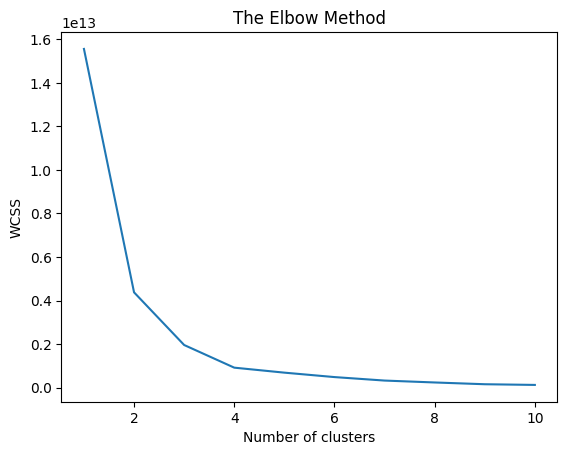

In [108]:
elbowOptimizer(X)

In [109]:
kmeans,labels = Trainer(4,X)

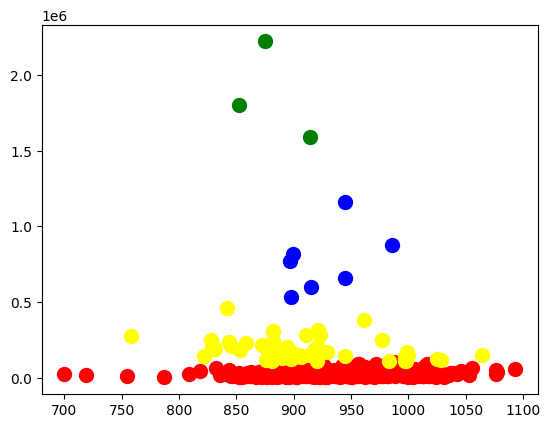

In [110]:
plt.scatter(X[labels==0,0],X[labels==0,1],s=100,color="red",label="cluster 1")
plt.scatter(X[labels==1,0],X[labels==1,1],s=100,color="green",label="cluster 2")
plt.scatter(X[labels==2,0],X[labels==2,1],s=100,color="blue",label="cluster 3")
plt.scatter(X[labels==3,0],X[labels==3,1],s=100,color="yellow",label="cluster 4")
plt.show()